> Dane są trzy zbiory reprezentowane przez tablice: $ A $, $ B $ i $ C $. Napisz algorytm, który powie, czy istnieje taka trójka $ a $, $ b $, $ c $ odpowiednio z $ A $, $ B $ i $ C $, że $ a + b = c $. Nie wolno korzystać ze słowników!

### Omówienie algorytmu

##### Wstępne przemyślenia

To zadanie jest bardzo podobne do zadania oznaczonego jako 'Zadanie 3. (dodatkowe)'. W tym przypadku nie mamy jednak tylko jednej tablicy, ale aż 3. Postępujemy analogicznie jak wtedy, więc zaczynamy od sortowania. Warto zauważyć, że nie jest konieczne sortowanie wszystkich tablic, ale musimy posortować przynajmniej 2 z nich po to, abyśmy mogli skorzystać z liniowego wyszukiwania sumy (dla każdego elementu z osobna, więc sumaryczna złożoność będzie dużo większa od liniowej). Do sortowania zazwyczaj wybieramy najkrótsze tablice, jednakże ma to miejsce wtedy, gdy sortowanie jest czynnikiem dominującym w złożoności całego algorytmu. W tym przypadku będziemy mieli jednak złożoność większą od złożoności sortowania (którejkolwiek z tablic), dlatego musimy się mu przyjrzeć najpierw. Ponieważ nie chcemy szukać trójek w czasie $ O(n \cdot m \cdot k) $, gdzie $ n $, $ m $, $ k $ - długości tablic (przyjmijmy, że $ n \le m \le k $), sprawdzając wszystkie możliwe kombinacje, musimy znaleźć szybszy algorytm. Podobnie jak w zadaniu 'Zadanie 3. (dodatkowe)', możemy użyć algorytmu, który sprawdza, czy istnieją takie 2 liczby (tu w dwóch różnych tablicach), że ich suma jest równa danej wartości. Oczywiście musimy takie sprawdzanie wykonać dla każdej wartości z trzeciej tablicy. W tym zadaniu akurat nie musimy przesadnie się przejmować tym, które tablice sortujemy itp., ale jeżeli mielibyśmy powiedziane, że któraś jest dużo dłuższa od innej, wybór dobrego planu działania będzie miał znaczenie. Konieczne wówczas będzie przesortowanie dwóch dłuższych tablic (najlepiej algorytmem Quick Sort, bo zrobimy to w czasie $ O(n \cdot log(n)) $, a $ log(n) $ ma bardzo niewielką wartość w porównaniu do $ n $), a następnie przechodzenie po najkrótszej tablicy i sprawdzanie, czy istnieją takie dwie wartości (jedna z najdłuższej tablicy, druga z drugiej w kolejności najdłuższej tablicy), że ich ... no właśnie co, już nie zawsze szukamy sumy. Trzeba jeszcze przemyśleć, co się stanie, jeżeli posortujemy dwie najdłuższe tablice, w jaki sposób będziemy poszukiwać wartości.

##### Jakie mamy możliwości?

- Posortowaliśmy tablice $ A $ i $ B $: <br>
Przechodzimy liniowo przez tablicę $ C $ (która nie jest posortowana) i szukamy sumy liczby $ a $ z posortowanej tablicy $ A $ oraz $ b $ z posortowanej tablicy $ B $ takiej, że $ c = a + b $, <br>
- Posortowaliśmy tablice $ A $ i $ C $: <br>
Przechodzimy liniowo przez tablicę $ B $ (która nie jest posortowana) i szukamy sumy liczby $ a $ z posortowanej tablicy $ A $ oraz $ c $ z posortowanej tablicy $ C $ takiej, że $ b = c - a $, <br>
- Posortowaliśmy tablice $ B $ i $ C $: <br>
Przechodzimy liniowo przez tablicę $ A $ (która nie jest posortowana) i szukamy sumy liczby $ b $ z posortowanej tablicy $ B $ oraz $ c $ z posortowanej tablicy $ C $ takiej, że $ a = c - b $, <br><br>
(Jak widać, zawsze wyznaczamy z równania tę wartość, która pochodzi z najkrótszej tablicy, jako sumę lub różnicę wartości z posortowanych, dłuższych tablic)

##### Analiza złożoności

Niech $ n $, $ m $, $ k $ - długości tablic takie, że $ n \le m \le k $, wtedy: <br>
- Sortowanie dwóch dłuższych tablic: <br>
$ O(m \cdot log(m)) + O(k \cdot log(k)) = O(m \cdot log(m) + k \cdot log(k)) \le O(2k \cdot log(k)) \le O(k \cdot log(k)) $ <br>
- Przechodzenie po wszystkich wartościach tablicy o długości $ n $ i poszukiwanie dla każdej z nich takich dwóch liczb, których suma jest równa tej wartości: <br>
$ O(n \cdot (m + k)) \le O(n \cdot (k + k)) \le O(n \cdot k) $ <br>
- RAZEM: <br>
$ O(k \cdot log(k) + n \cdot k) = O(k \cdot (log(k) + n)) $

##### Porównanie złożoności

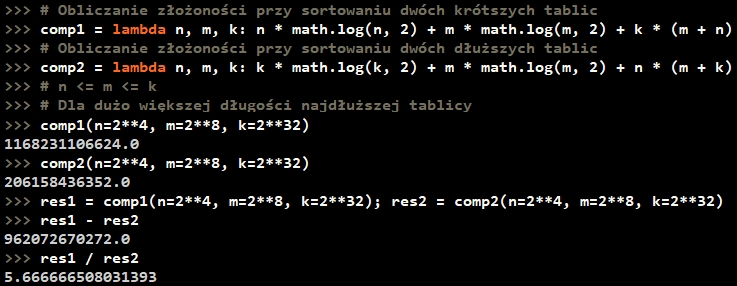

### Implementacja algorytmu #1
##### (Trochę skomplikowana, ale automatycznie obsługuje wszystkie przypadki - różne długości tablic)

In [1]:
def check_sums(A, B, C):
    if not A or not B or not C: return None
    
    # If A is the shortest array
    if len(A) < len(B) and len(A) < len(C):
        # Sort two longer arrays
        quick_sort(B)
        quick_sort(C)
        # Check if a = c - b for at least one a in A, where b, c - elements from B, C
        return _check_if_exist(A, C, B, -1)
    # If B is the shortest array
    elif len(B) < len(A) and len(B) < len(C):
        # Sort two longer arrays
        quick_sort(A)
        quick_sort(C)
        # Check if b = c - a for at least one b in B, where a, c - elements from A, C
        return _check_if_exist(B, C, A, -1)
    # If C is the shortest array or all are of equal lengths
    else:
         # Sort two longer arrays
        quick_sort(A)
        quick_sort(B)
        # Check if c = a + b for at least one c in C, where a, b - elements from A, B
        return _check_if_exist(C, A, B, +1)
        
        
def _check_if_exist(not_sorted_arr, sorted_arr1, sorted_arr2, op):
    for val in not_sorted_arr:
        if is_sum_of_two_other_values(val, sorted_arr1, sorted_arr2, op):
            return True
    return False


def comp_fn(searched_res, num1, num2, op):
    res = num1 + op * num2
    if res > searched_res: return 1
    if res < searched_res: return -1
    return 0

    
def is_sum_of_two_other_values(val, arr1, arr2, op):
    # When we add two values
    if op > 0:
        i = 0
        j = len(arr2) - 1
        
        while i < len(arr1) and j >= 0:
            curr_step = comp_fn(val, arr1[i], arr2[j], op)
            # If curr_delta == 1, then current result is too small so we have to 
            # search for a greater one
            if curr_step == 1: j -= 1
            # If curr_delta == -1, then current result is too large so we have to
            # search for a lower one
            elif curr_step == -1: i += 1
            # Eventually, we found a desired value
            else: return True
            
    # When we subtract the second value from the first one
    elif op < 0:
        i = j = 0

        while i < len(arr1) and j < len(arr2):
            curr_step = comp_fn(val, arr1[i], arr2[j], op)
            # If curr_delta == 1, then current result is too small so we have to 
            # search for a greater one
            if curr_step == 1: j += 1
            # If curr_delta == -1, then current result is too large so we have to
            # search for a lower one
            elif curr_step == -1: i += 1
            # Eventually, we found a desired value
            else: return True
        
    return False


def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1  # I removed a tailing recursion
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position  # I removed a tailing recursion
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater or equal to a pivot 
    # (in this partition algorithm pivot isn't placed on a fixed position 
    # but can be also swapped like all the remaining values)
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [2]:
import random
from decimal import Decimal  # Use decimal as operations on floats give wrong results

def rand_arr(type_):
    if type_ is int:
        return [random.randint(-100, 100) for _ in range(random.randint(0, 100))]
    if type_ is float:
        return [Decimal(f"{random.randint(-100, 100) * random.random():.2f}") for _ in range(random.randint(0, 100))]
    return []

# Brute force check
def find_matching(A, B, C):
    set_C = set(C)
    for i, a in enumerate(A):
        for j, b in enumerate(B):
            c = a + b
            if c in C:
                return f'{c} = {a} + {b}   (a + b in C, where: a = A[{i}], b = B[{j}], c = C[{C.index(c)}])'
    return None

# Test function
def test(fn, type_, *, print_info=True):
    A, B, C = (rand_arr(type_) for _ in range(3))
    result = fn(A, B, C)
    first_matching = find_matching(A, B, C)
    expected = True if first_matching is not None else False if A and B and C else None
    if print_info:
        A_sorted = sorted(A)
        B_sorted = sorted(B)
        C_sorted = sorted(C)
        if type_ is float:
            A_sorted = list(map(float, A_sorted))
            B_sorted = list(map(float, B_sorted))
            C_sorted = list(map(float, C_sorted))
        print('Sorted array A:', A_sorted, sep='\n', end='\n\n')
        print('Sorted array B:', B_sorted, sep='\n', end='\n\n')
        print('Sorted array C:', C_sorted, sep='\n', end='\n\n')
        print('Result:', result)
        print('Expected:', expected)
        if first_matching is not None:
            print('First matching:', first_matching)
    return expected == result

In [3]:
print('Correct result?:', test(check_sums, int))

Sorted array A:
[-86, -85, -81, -77, -70, -59, -46, -42, -37, -35, -33, -29, -24, -17, -6, 1, 8, 26, 46, 53, 53, 55, 55, 82, 86, 95, 96, 98, 99]

Sorted array B:
[-100, -82, -79, -67, -66, -63, -60, -49, -44, -30, -28, -26, -19, -17, -16, 0, 4, 8, 14, 18, 26, 31, 47, 51, 55, 56, 57, 62, 62, 67, 70, 73, 79, 80, 80, 89, 92, 93, 94, 97, 98]

Sorted array C:
[-95, -95, -93, -91, -87, -77, -76, -73, -67, -57, -50, -48, -47, -40, -33, -30, -27, -18, -16, -15, -8, 5, 10, 10, 12, 13, 15, 19, 24, 38, 41, 43, 46, 52, 74, 75, 75, 78, 84, 94, 97, 100]

Result: True
Expected: True
First matching: 13 = 95 + -82   (a + b in C, where: a = A[0], b = B[1], c = C[25])
Correct result?: True


In [4]:
# i = 0
# while True:
#     random.seed(i)
#     if not test(check_sums, float, print_info=False):
#         print(i)
#         break
#     i += 1

### Implementacja algorytmu #2
#### (Łatwiejsza, sortuje zawsze te tablice, z których elementy mają być sumowane)

In [5]:
def check_sums(A, B, C):
    if not A or not B or not C: return None
    
    # Sort A and B array
    quick_sort(A)
    quick_sort(B)
    
    # Check if c = a + b for at least one c from C, where a, b are from A, B
    for c in C:
        if is_sum_of_two_other_values(c, A, B):
            return True
    return False

    
def is_sum_of_two_other_values(target_c, A, B):
    i = 0
    j = len(B) - 1

    while i < len(A) and j >= 0:
        c = A[i] + B[j]
        # If a current sum is greater than a desired 'c', look for a lower one
        if c > target_c:   j -= 1
        # If a current sum is lower than a desired 'c', look for a greater one
        elif c < target_c: i += 1
        # Eventually, we found a desired value
        else: return True
        
    return False


def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1  # I removed a tailing recursion
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position  # I removed a tailing recursion
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater or equal to a pivot 
    # (in this partition algorithm pivot isn't placed on a fixed position 
    # but can be also swapped like all the remaining values)
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [6]:
test(check_sums, int)

Sorted array A:
[-98, -92, -85, -70, -62, -36, -36, -26, -18, -8, -4, -4, 41, 43, 56, 68, 69, 71, 79, 94]

Sorted array B:
[-98, -97, -96, -92, -90, -90, -90, -89, -88, -87, -86, -84, -82, -82, -80, -77, -72, -71, -66, -61, -60, -59, -56, -53, -49, -48, -47, -45, -42, -38, -38, -33, -30, -29, -29, -25, -21, -21, -19, -14, -14, -10, -9, -8, 0, 1, 1, 3, 4, 9, 9, 15, 18, 21, 23, 23, 24, 25, 26, 28, 29, 29, 30, 31, 32, 33, 33, 41, 44, 48, 48, 56, 56, 64, 69, 71, 71, 83, 86, 86, 88, 92, 95, 99, 100]

Sorted array C:
[-100, -95, -90, -88, -82, -79, -76, -70, -64, -62, -49, -47, -34, -30, -23, -23, -14, 1, 9, 18, 20, 21, 24, 46, 53, 55, 62, 71, 73, 77, 80, 83, 87, 88, 90, 96]

Result: True
Expected: True
First matching: -95 = -98 + 3   (a + b in C, where: a = A[0], b = B[47], c = C[25])


True